<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0707%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#사이킷런을 활용한 추천 시스템 입문
- 추천 로직은 범주형 데이터를 다룬다.
- 액션물, 로맨스물, 스릴러물, 한드, 미드, 일드, 영드 등의 영화 item 데이터와 A, B, C 같은 user 데이터를 취급했습니다. 이러한 데이터는 연속적(continuous)이지 않고 이산적(discrete)입니다. 이를 범주형(categorical) 데이터라고 합니다.
- (숫자 벡터로 변환한 뒤) 유사도를 계산한다.
범주형 데이터들을 좌표에 나타내었는데, 좌표에 나타내기 위해서는 숫자로 이루어진 벡터(numerical vector)로 변환해야 합니다. 그리고 그 거리를 계산하여 유사도를 계산합니다.


## 코사인 유사도(Cosine Similarity)
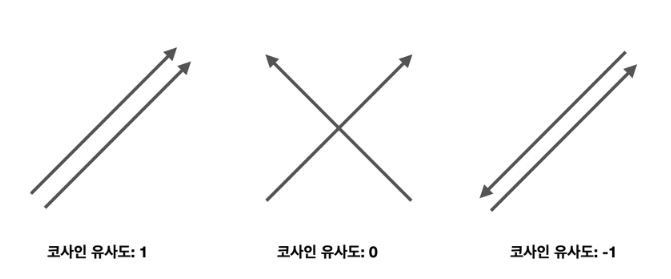

### NumPy 활용

In [2]:
import numpy as np

t1 = np.array([1,1,1])
t2 = np.array([2,0,1])

In [3]:
# 코사인 유사도 구하는 함수
from numpy import dot
from numpy.linalg import norm
def cos_sim(A,B):
  return dot(A,B)/(norm(A)*norm(B))

In [4]:
cos_sim(t1, t2)

np.float64(0.7745966692414834)

### 사이킷런 활용
사이킷런에서 코사인 다음 모듈을 임포트

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
t1 = np.array([[1, 1, 1]])
t2 = np.array([[2, 0, 1]])
cosine_similarity(t1,t2)

array([[0.77459667]])

In [7]:
# Q. 아래 t1, t2 리스트의 요소 값을 조정해서 코사인 유사도 값이 0이 되게 만들어보세요.
# +코사인 유사도 값이 -1이 되게도 만들어보세요.
t1 = np.array([[1, 1, 1]])
t2 = np.array([[1, 1, 1]])
cosine_similarity(t1,t2)

array([[1.]])

In [8]:
# Q. 아래 t1, t2 리스트의 요소 값을 조정해서 코사인 유사도 값이 0이 되게 만들어보세요.
# +코사인 유사도 값이 -1이 되게도 만들어보세요.
t1 = np.array([[1, 1, 1]])
t2 = np.array([[-1, -1, -1]])
cosine_similarity(t1,t2)

array([[-1.]])

## 추천시스템의 종류
▶︎ 콘텐츠 기반 필터링(Content Based Filtering)

▶︎ 협업 필터링(Collaborative Filtering)

사용자 기반
아이템 기반
잠재요인 협업 필터링 (latent factor collaborative filtering) → 행렬 인수분해(matrix factorization)

▶︎︎︎ Deep Learning 적용 or Hybrid 방식

## 콘텐츠 기반 필터링
영화에서 비슷한 콘텐츠? 장르, 배우, 감독 등의 정보를 가지고 영화 등등, 이런 정보들이 영화의 특성(Feature) 이 되고,
이 특성이 '콘텐츠'가 비슷하다고 말할 수 있는 요인

In [9]:
# 콘텐츠 기반 필터링 실습
# 필요한 모듈 Import
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print('⏩⏩')

⏩⏩


In [14]:
# Load Data
import os
csv_path = 'movie_dataset.csv'
df = pd.read_csv(csv_path)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [15]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [16]:
features = ['keywords','cast','genres','director']
features

['keywords', 'cast', 'genres', 'director']

In [17]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

combine_features(df[:5])

,0
0,culture clash future space war space colony so...
1,ocean drug abuse exotic island east india trad...
2,spy based on novel secret agent sequel mi6 Dan...
3,dc comics crime fighter terrorist secret ident...
4,based on novel mars medallion space travel pri...


In [18]:
for feature in features:
  df[feature] = df[feature].fillna('')

df["combined_features"] = df.apply(combine_features, axis = 1)
df["combined_features"]
# 해당 특성을 텍스트 데이터로 보고, 보고자 하는 특성으로 이루어진 텍스트 데이터를 새로운 칼럼으로 생성

,combined_features
0,culture clash future space war space colony so...
1,ocean drug abuse exotic island east india trad...
2,spy based on novel secret agent sequel mi6 Dan...
3,dc comics crime fighter terrorist secret ident...
4,based on novel mars medallion space travel pri...
...,...
4798,united states\u2013mexico barrier legs arms pa...
4799,Edward Burns Kerry Bish\u00e9 Marsha Dietlein...
4800,date love at first sight narration investigati...
4801,Daniel Henney Eliza Coupe Bill Paxton Alan Ru...


In [21]:
# 벡터화하고, 코사인 유사도를 계산
#  장르, 배우명, 감독명의 텍스트 데이터를 범주형 데이터로 보기 때문에 단순하게 등장횟수를 세어 숫자 벡터로 만든다. 사이킷런의 CountVectorizer()를 사용

cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
print(type(count_matrix))
print(count_matrix.shape)
print(count_matrix)

<class 'scipy.sparse._csr.csr_matrix'>
(4803, 14845)
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 97547 stored elements and shape (4803, 14845)>
  Coords	Values
  (0, 3115)	1
  (0, 2616)	1
  (0, 4886)	1
  (0, 12386)	2
  (0, 14235)	1
  (0, 2755)	1
  (0, 12299)	1
  (0, 11517)	1
  (0, 14561)	1
  (0, 14820)	1
  (0, 11490)	1
  (0, 12134)	1
  (0, 14291)	1
  (0, 12567)	1
  (0, 7496)	1
  (0, 8831)	1
  (0, 11217)	1
  (0, 86)	1
  (0, 144)	1
  (0, 4435)	1
  (0, 11745)	1
  (0, 4566)	1
  (0, 6542)	1
  (0, 2061)	1
  (1, 86)	1
  :	:
  (4801, 10069)	1
  (4801, 5844)	1
  (4801, 252)	1
  (4801, 4098)	1
  (4801, 14796)	1
  (4801, 11361)	1
  (4801, 2978)	1
  (4801, 12036)	1
  (4801, 6138)	1
  (4802, 9659)	1
  (4802, 3812)	1
  (4802, 1788)	2
  (4802, 4210)	1
  (4802, 5181)	1
  (4802, 2912)	1
  (4802, 3821)	1
  (4802, 1069)	1
  (4802, 11185)	1
  (4802, 3681)	1
  (4802, 5399)	1
  (4802, 3894)	1
  (4802, 2056)	1
  (4802, 3093)	1
  (4802, 4502)	1
  (4802, 5900)	2


- count_matrix는 type을 확인해 본 결과, CSR(Compressed Sparse Row) Matrix였습니다. CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보로만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조입니다.
- 예를 들어, (0, 3115) 1라고 되어 있는 것은 1번째 row는 3116번째 단어가 1번 출현한다는 뜻입니다. 이 데이터셋에는 총 14845개의 단어가 존재하는데, 이 단어들을 범주형으로 보고 그 단어의 출현 빈도만을 표시한 Matrix가 매우 Sparse하기 때문에 공간을 절약할 수 있는 형태로 표현한 것입니다.
- 이제 4803개의 영화들이 모두 Vectorized되었습니다. 이 영화들끼리의 코사인 유사도를 표현하는 4803X4803 의 cosine_similarity matrix를 구해 봅시다

In [22]:
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)
print(cosine_sim.shape)
#  예를 들어 10번 영화와 500번 영화의 유사도 점수가 궁금하다면, 이 표의 10번째 줄, 500번째 칸을 찾아보면 됩니다.

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]
(4803, 4803)


### 추천

In [23]:
# 코사인 유사도로 계산된 가장 비슷한 영화를 3편 선별하여 추천
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

i=0
print(movie_user_likes+"와 비슷한 영화 3편은 "+"\n")
for item in sorted_similar_movies:
    print(get_title_from_index(item[0]))
    i=i+1
    if i==3:
        break


Avatar와 비슷한 영화 3편은 

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1


In [25]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

movie_user_likes = "Titanic"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

i=0
print(movie_user_likes+"와 비슷한 영화 5편은 "+"\n")
for item in sorted_similar_movies:
    print(get_title_from_index(item[0]))
    i=i+1
    if i==5:
        break


Titanic와 비슷한 영화 5편은 

Revolutionary Road
Me You and Five Bucks
All the King's Men
The Day the Earth Stood Still
Almost Famous


## 협업 필터링 (1) 협업 필터링의 종류
- 협업 필터링(Collaborative Filtering) 은 과거의 사용자 행동 양식(User Behavior) 데이터를 기반으로 추천하는 방식
- 사용자들의 정보는 user_id에 저장. 그리고 영화 정보는 item_id입니다. 사용자는 영화를 보고 평점 (rating)을 매겼습니다. 그 평점을 매긴 시각이 timestamp 칼럼에 기록

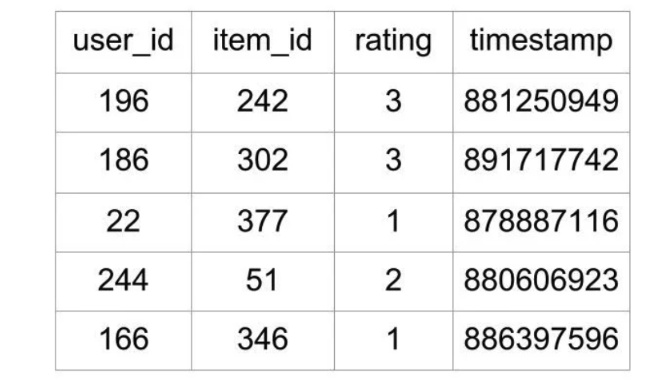

- 위 데이터를 사용자와 아이템 간 interaction matrix로 변환. 해당 행렬의 데이터로 평점을 넣으면 아래와 같은 형태가 되고 이를 평점행렬이라고 부른다.
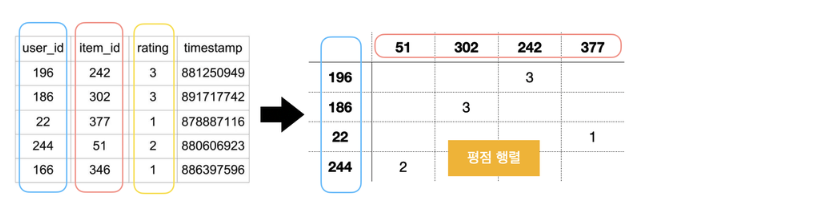

- 이런 행렬은 sparse한 문제. 대부분 평점에 대한 데이터는 0이다.
- 사용자 기반과 아이템 기반은 유사도를 계산하는 방식이고 잠재요인은 행렬 인수분해(matrix factorization)를 이용해 잠재요인을 분석
- 평점행렬로 변환한 후, 평점행렬의 유사도를 계산하여 추천하는 방식은 사용자 기반과 아이템 기반 방식. 이 평점행렬을 분해하여 더 많은 정보들을 고려하는 방식이 잠재요인 필터링

### 사용자 기반
- Ex) 사용자 기반: 당신과 비슷한 고객들이 다음 상품을 구매했습니다.
- 동일한 제품에 대해 평점을 매긴 데이터를 분석해 추천하는 방식
- User4가 item1을 구매하였습니다. 그리고 User4와 가장 유사한 User2는 item1 ~ 4까지 다음과 같이 평점
- User2가 선호한 제품인 item3을 User4에게 추천해 주는 방식
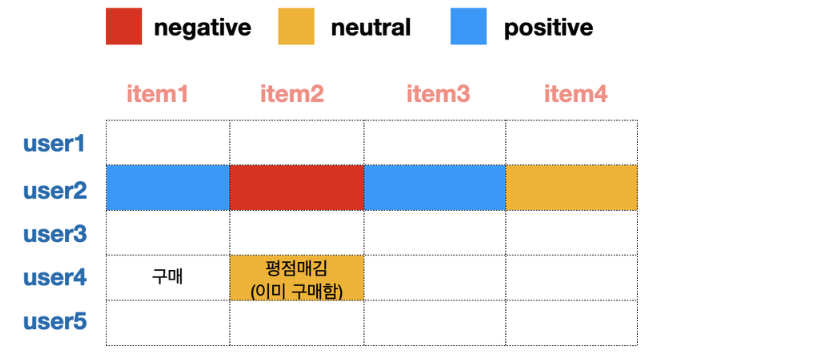

### 아이템
- Ex) 이 상품을 선택한 다른 고객들은 다음 상품을 구매했습니다.
- 아이템 간의 유사도를 측정하여 해당 아이템을 추천하는 방식
- 사용자 기반보다는 아이템 기반 방식이 정확도가 더 높다

## 협업 필터링 (2) 행렬 인수분해
행렬 인수분해의 기법

SVD(Singular Vector Decomposition)

ALS(Alternating Least Squares)

NMF(Non-negative Matrix Factorization)

30을 인수분해하면 30 = 6X5 = 3X10 = 1X30 이런 식으로 곱하기로 나타낼 수 있겠죠? 행렬도 곱으로 분해 할 수 있으며, 분해 행렬을 사용하면 원하는 답을 더 쉽게 찾을 수 있습니다. (추천 알고리즘에서 파라미터 수가 줄어 든다)

### SVD
SVD(Singular Vector Decomposition)는 특잇값 분해이다.

- M X N 형태의 행렬 A을 다음과 같은 형태로 분해

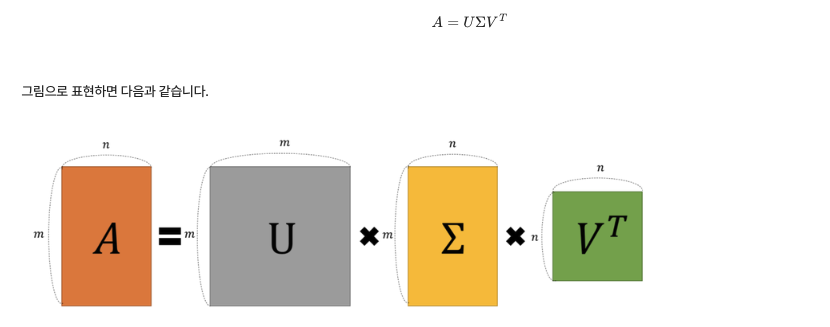

### numpy.linalg의 svd 모듈을 import한 후, 4 X 4형태의 행렬 A를 SVD

In [26]:
import numpy as np
from numpy.linalg import svd

In [27]:
np.random.seed(30)
A = np.random.randint(0,100, size = (4,4))
A

array([[37, 37, 45, 45],
       [12, 23,  2, 53],
       [17, 46,  3, 41],
       [ 7, 65, 49, 45]])

In [28]:
svd(A)

SVDResult(U=array([[-0.54937068, -0.2803037 , -0.76767503, -0.1740596 ],
       [-0.3581157 ,  0.69569442, -0.13554741,  0.60777407],
       [-0.41727183,  0.47142296,  0.28991733, -0.72082768],
       [-0.6291496 , -0.46389601,  0.55520257,  0.28411509]]), S=array([142.88131188,  39.87683209,  28.97701433,  14.97002405]), Vh=array([[-0.25280963, -0.62046326, -0.4025583 , -0.6237463 ],
       [ 0.06881225, -0.07117038, -0.8159854 ,  0.56953268],
       [-0.73215039,  0.61782756, -0.23266002, -0.16767299],
       [-0.62873522, -0.47775436,  0.34348792,  0.50838848]]))

In [29]:
# 결과값으로 행렬 U와 행렬 Σ, 행렬 V의 전치행렬이 생성됩니다. 우리는 이 값들을 unpacking해서 각각 변수명에 할당해 줍니다. 각 행렬들을 확인.
U, Sigma, VT = svd(A)

print('U matrix: {}\n'.format(U.shape),U)
print('Sigma: {}\n'.format(Sigma.shape),Sigma)
print('V Transpose matrix: {}\n'.format(VT.shape),VT)

U matrix: (4, 4)
 [[-0.54937068 -0.2803037  -0.76767503 -0.1740596 ]
 [-0.3581157   0.69569442 -0.13554741  0.60777407]
 [-0.41727183  0.47142296  0.28991733 -0.72082768]
 [-0.6291496  -0.46389601  0.55520257  0.28411509]]
Sigma: (4,)
 [142.88131188  39.87683209  28.97701433  14.97002405]
V Transpose matrix: (4, 4)
 [[-0.25280963 -0.62046326 -0.4025583  -0.6237463 ]
 [ 0.06881225 -0.07117038 -0.8159854   0.56953268]
 [-0.73215039  0.61782756 -0.23266002 -0.16767299]
 [-0.62873522 -0.47775436  0.34348792  0.50838848]]


- 이제 다시 복원. 복원을 위해서는 U, Σ, VT를 내적. 유의할 사항은 Σ는 1차원 이므로 0을 포함한 대각 행렬로 변환한 뒤 내적

In [30]:
Sigma_mat = np.diag(Sigma)

A_ = np.dot(np.dot(U, Sigma_mat), VT)
A_

array([[37., 37., 45., 45.],
       [12., 23.,  2., 53.],
       [17., 46.,  3., 41.],
       [ 7., 65., 49., 45.]])

### Truncated SVD
추천 시스템에서의 행렬 인수분해는 SVD 중에서도 Truncated SVD를 사용.

Truncated SVD는 SVD의 일종으로 잘린 SVD이다. 다른 말로 LSA(Latent semantic analysis), 잠재 의미 분석 이라고 번역할 수 있습니다. Truncated SVD를 이용해 분해한 뒤 복원하면 SVD 처럼 완벽히 같은 행렬이 나오지 않는다. 그 이유는 Truncated SVD는 차원을 축소한 다음 행렬을 분해하기 때문

Truncated SVD는 상위 특이값만 선택해 차원을 줄이고 데이터의 핵심 정보만 남겨 근사 행렬을 만든다. 이로 인해 계산 효율이 높고 데이터 압축, 노이즈 제거에 유리하지만, 원본 행렬을 완벽히 복원하지는 못헌더,

## 협업 필터링 (3) 행렬 인수분해와 잠재요인 협업 필터링
- SVD(특이값 분해)를 평가행렬에 적용하여 잠재요인을 분석하는 것을 도식화


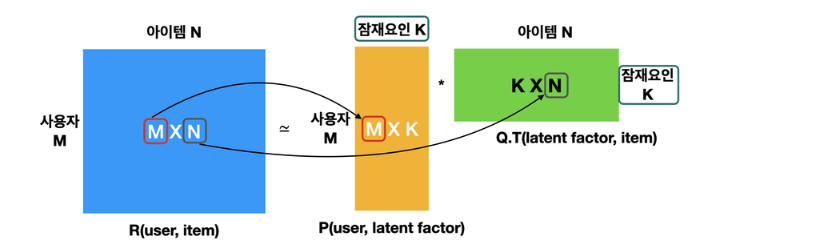

R: 사용자와 아이템 사이의 행렬
P: 사용자와 잠재요인 사이의 행렬
Q: 아이템과 잠재요인 사이의 행렬 —> 전치 행렬 형태로 나타냄

사용자가 평점을 매기는 요인을 그냥 "잠재요인"으로 취급한 뒤 그걸 SVD기법을 이용해 분해한 뒤 다시 합치는 방법으로 영화에 평점을 매긴 이유를 벡터화하여 이를 기반으로 추천